In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
import matplotlib as mpl
import cmocean
import cmocean.cm as cmo

In [2]:
ds=netCDF4.Dataset('1_temp.nc')
data=ds['temp'][:].data

dt=netCDF4.Dataset('1_elev.nc')
tide=dt['elev']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  


In [3]:
data.shape

(480, 29, 1555)

In [4]:
nodeid=pd.read_csv('nodeid.txt',header=None)

In [5]:
#node number 
nodenum= len(nodeid)-1

In [6]:
transec=pd.read_csv('transect1.out',sep='\s+',header=None)

In [7]:
timestart=72  #                                         %要改,nc檔讀取開始的時間
timeend  =480 #                                         %要改,nc檔讀取結束的時間
Climax   =32  #                                         %要改,color bar 最大值
Climin   =10  #                                         %要改,color bar 最小值
Cspace   =1   #                                         %要改,color bar 間隔
datestart=18  #                                         %要改 

In [8]:
nodedp=transec.iloc[:,5]
nodedis=[]
for i in range(nodenum-1):
    nodedis.append(transec.iloc[i+1,4]-transec.iloc[i,4])  
nodedis_2=[np.round(i/10) for i in nodedis]
nodedis_3=[]
st=1
for i in nodedis_2:
    nodedis_3.append(st)
    st=st+i
nodedis_3.append(st)

In [9]:
vlayer = data.shape[1]                  #垂直分層數
maxdp =round(np.max(nodedp)*1.1 )              #maximun water depth in drewmap
maxdis=  np.sum(nodedis_2[0:nodenum-1]) #maximun dis
maxdrate=1
[xi,yi]=np.meshgrid(np.linspace(1, maxdis,maxdis ),np.linspace(1, maxdp*maxdrate,maxdp*maxdrate ) )
ts2e=timeend-timestart
tide=tide[timestart-1:-1,nodeid[0][1]-1]  #取出 位置(nodeid[0][1])  時間資料(timestart-1:-1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


## Get data that u want   
salt=[time,bp,layer]

In [10]:
salt=[]
for time in range(ts2e):
    s=[]
    for k in range(nodenum):
        s.append(data[time+timestart-1,0:vlayer,nodeid[0][k+1]-1])
    salt.append(s)
salt=np.array(salt)
salt[salt ==-9999]=np.nan

In [11]:
salt.shape

(408, 17, 29)

In [12]:
elevcount=0

In [13]:
rec1=[]
for c1 in range(nodenum):
    rec1.append(abs(transec.iloc[c1,1]))

In [14]:
f1=interp1d(nodedis_3,rec1,kind='linear')
rec3 = f1(np.linspace(1,maxdis,maxdis))

f2=interp1d(nodedis_3,nodedp,kind='linear')
nodedp2=f2(np.linspace(1,maxdis,maxdis))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


In [15]:
posi=np.zeros([vlayer,vlayer])
posib=np.zeros([vlayer,vlayer])
xposi=np.zeros(np.sum(rec1))
yposi=np.zeros(np.sum(rec1))
zposi=np.zeros(np.sum(rec1))


In [16]:
ma=salt[0,:,:]

In [17]:
ma.shape

(17, 29)

In [18]:
count=0;
for n in range(nodenum):
    r11=rec1[n]-1
    r12=r11+8
    posi[0:rec1[n],n]=abs(transec.iloc[n,7:r12])
    posib[0:rec1[n],n]=maxdrate*posi[0:rec1[n],n]
    posib[0,n]=0.00001
    
    rec=rec1[n]
    rec2=vlayer-rec1[n]+1
    xposi[0+count:rec+count] = nodedis_3[n]
    yposi[0+count:rec+count] = posib[0:rec,n]
    sb=ma[n,range(vlayer-1,rec2-2,-1)]  
    zposi[0+count:rec+count] = sb   
    count=rec1[n]+count

In [19]:

zi2 = griddata((xposi,yposi), zposi, (xi, yi) ,method='linear')
zi = np.round(zi2[:,:],4) 
#打造海底地形
for k in range(int(maxdis)):
    h=int(nodedp2[k]*maxdrate )
    maxyi=int(len(yi[:,k]))
    zi[h:maxyi,k]=np.nan

In [20]:
yi=yi*-1

In [21]:
# the color bar
# https://matplotlib.org/cmocean/#rain

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


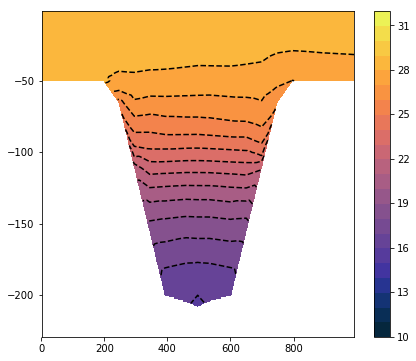

In [24]:
fig=plt.figure(figsize=(7, 6))
cs = plt.contourf(xi, yi, zi,np.linspace(Climin,Climax,(Climax-Climin)/Cspace+1),cmap=cmo.thermal)
plt.contour(xi, yi, zi,np.linspace(Climin,Climax,(Climax-Climin)/Cspace+1),colors='k',linestyles='dashed' )
cbar = fig.colorbar(cs)